## Plotting the distribution of programming languages

In [1]:
import urllib.request
from unidiff import PatchSet
import os
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import json
from pandas import json_normalize
from tabulate import tabulate 
import glob
import time
from pathlib import Path


output_dir = 'data/FixMe/'
DB_DIR = 'data/FixMe/Fixme-first.db'

# df_patch = pd.read_csv(f'{output_dir}/patches.csv')

# get patch table from db
df_hunk = pd.read_sql_table(
    table_name='hunk_collection', 
    con=f'sqlite:///{DB_DIR}'
    )
df_hunk.head(5)

,file,hunk,hunk_patch,source,target,source_lines,target_lines,added_lines,removed_lines,before_code,after_code,source_start,source_length,target_start,target_length,section_header,hunk_length
0,src/libraw_cxx.cpp,"@@ -2336,14 +2336,15 @@ int LibRaw::subtract_b...","@@ -2336,14 +2336,15 @@ int LibRaw::subtract_b...","[' #define MAX(a,b) ((a) > (b) ? (a) : (b))\n'...","[' #define MAX(a,b) ((a) > (b) ? (a) : (b))\n'...",<bound method Hunk.source_lines of <Hunk: @@ 2...,<bound method Hunk.target_lines of <Hunk: @@ 2...,"['\t\t\tint dmax = 0;\n', '\t\t\tfor(i=0; i< s...","['\n', ' for(i=0; i< size*4; i++)\n...","#define MAX(a,b) ((a) > (b) ? (a) : (b))\n#def...","#define MAX(a,b) ((a) > (b) ? (a) : (b))\n#def...",2336,14,2336,15,int LibRaw::subtract_black(),18
1,src/libraw_cxx.cpp,"@@ -2359,9 +2360,10 @@ int LibRaw::subtract_bl...","@@ -2359,9 +2360,10 @@ int LibRaw::subtract_bl...",[' // only calculate channel maximum...,[' // only calculate channel maximum...,<bound method Hunk.source_lines of <Hunk: @@ 2...,<bound method Hunk.target_lines of <Hunk: @@ 2...,"['\t\t int dmax = 0;\n', ' if(dmax...","[' C.data_maximum = 0;\n', ' ...",// only calculate channel maximum;\n...,// only calculate channel maximum;\n...,2359,9,2360,10,int LibRaw::subtract_black(),12
2,src/libraw_cxx.cpp,"@@ -2421,8 +2423,10 @@ void LibRaw::exp_bef(fl...","@@ -2421,8 +2423,10 @@ void LibRaw::exp_bef(fl...",[' imgdata.image[i][3] = lut[imgda...,[' imgdata.image[i][3] = lut[imgda...,<bound method Hunk.source_lines of <Hunk: @@ 2...,<bound method Hunk.target_lines of <Hunk: @@ 2...,"['\tif(C.data_maximum <=TBLN)\n', '\t\tC.data_...",[' C.data_maximum = lut[C.data_maximum];\n'...,imgdata.image[i][3] = lut[imgdata....,imgdata.image[i][3] = lut[imgdata....,2421,8,2423,10,"void LibRaw::exp_bef(float shift, float smooth)",12
3,src/libraw_cxx.cpp,"@@ -2530,7 +2534,7 @@ int LibRaw::dcraw_proces...","@@ -2530,7 +2534,7 @@ int LibRaw::dcraw_proces...","[' \n', ' raw2image_ex(subtract_inline...","[' \n', ' raw2image_ex(subtract_inline...",<bound method Hunk.source_lines of <Hunk: @@ 2...,<bound method Hunk.target_lines of <Hunk: @@ 2...,['\t\tint save_4color = O.four_color_rgb;\n'],[' int save_4color = O.four_color_rgb;\n'],\n raw2image_ex(subtract_inline); // al...,\n raw2image_ex(subtract_inline); // al...,2530,7,2534,7,int LibRaw::dcraw_process(void),8
4,hawtjni-runtime/src/main/java/org/fusesource/h...,"@@ -9,13 +9,11 @@\n *************************...","@@ -9,13 +9,11 @@\n *************************...",[' ******************************************...,[' ******************************************...,<bound method Hunk.source_lines of <Hunk: @@ 9...,<bound method Hunk.target_lines of <Hunk: @@ 9...,"['import java.io.*;\n', 'import java.util.Rand...","['import java.io.File;\n', 'import java.io.Fil...",*********************************************...,*********************************************...,9,13,9,11,,15


In [2]:
# get cve table from db
df_cve = pd.read_sql_table(
    table_name='cve', 
    con=f'sqlite:///{DB_DIR}'
    )
df_cve.head(5)

,AKA,ASSIGNER,DATA_ASSIGNED,DATE_ASSIGNED,DATE_ASSIGNEDE,DATE_PUBLIC,DATE_REQUESTED,ID,REQUESTER,meta_state,...,meta_title,userInteraction,vectorString,vendor_data,version,work_around,workarounds,x_generator,x_redhatCweChain,cwe
0,None,secalert@redhat.com,None,None,None,None,None,CVE-2013-2127,None,PUBLIC,...,None,None,None,[{'product': {'product_data': [{'product_name'...,None,None,None,None,None,['unknown']
1,None,security@google.com,None,None,None,None,None,CVE-2013-2873,None,PUBLIC,...,None,None,None,[{'product': {'product_data': [{'product_name'...,None,None,None,None,None,['unknown']
2,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,['unknown']
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,['unknown']
4,None,security@google.com,None,None,None,None,None,CVE-2013-2832,None,PUBLIC,...,None,None,None,[{'product': {'product_data': [{'product_name'...,None,None,None,None,None,['unknown']


In [3]:
df_cve.columns

Index(['AKA', 'ASSIGNER', 'DATA_ASSIGNED', 'DATE_ASSIGNED', 'DATE_ASSIGNEDE',
       'DATE_PUBLIC', 'DATE_REQUESTED', 'ID', 'REQUESTER', 'meta_state',
       'TITLE', 'UPDATED', 'advisory', 'affected', 'assignerOrgId',
       'assignerShortName', 'attackComplexity', 'attackVector',
       'availabilityImpact', 'baseScore', 'baseSeverity',
       'confidentialityImpact', 'configuration', 'configurations', 'credit',
       'credits', 'cveId', 'cvss', 'dataType', 'dataVersion', 'data_format',
       'data_type', 'data_version', 'dateAssigned', 'datePublic',
       'datePublished', 'dateReserved', 'defect', 'description_data',
       'descriptions', 'discovery', 'engine', 'error', 'exploit', 'exploits',
       'generator', 'impact', 'impacts', 'importer', 'integrityImpact',
       'message', 'metrics', 'orgId', 'privilegesRequired', 'problemTypes',
       'problemtype_data', 'reference_data', 'references', 'requesterUserId',
       'scope', 'shortName', 'solution', 'solutions', 'state', 't

In [4]:
df_cve.meta_state.value_counts()

meta_state
PUBLIC    8751
None      5749
Name: count, dtype: int64

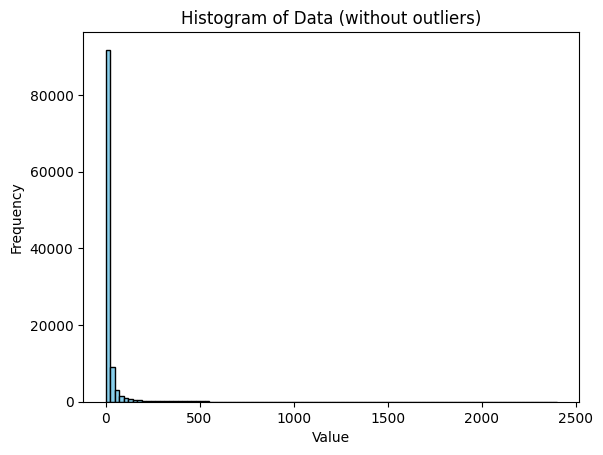

In [5]:


import numpy as np
import matplotlib.pyplot as plt

# Calculate mean and standard deviation
data = df_hunk.hunk_length.astype(int)

# Convert the list to a numpy array for easier computation
data_array = np.array(data)

# Calculate mean and standard deviation
mean = np.mean(data_array)
std_dev = np.std(data_array)

# Define the range for non-outliers (e.g., within 3 standard deviations)
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

# Filter out outliers
data_no_outliers = [x for x in data if (x >= lower_bound) and (x <= upper_bound)]

# Plot histogram of non-outliers
plt.hist(data_no_outliers, bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of Data (without outliers)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [6]:
# plot_value_counts(col=df_patch['pl'], xlabel='Programming-Languages', ylabel='#patches')


pls = df_patch['pl'].value_counts()

fig, ax = plt.subplots(figsize=(4, 3))
bar_width = 0.5
bars = ax.barh(pls.index, pls.values, color='lightgray', edgecolor='black', height=bar_width)
ax.set_ylabel('Programming-Languages')
ax.set_xlabel('#samples')
plt.tight_layout()
plt.savefig(f'figure/Programming-Languages.png')
plt.show()


NameError: name 'df_patch' is not defined

# The function that counts the length of words in the values of a specified column in a DataFrame and plots the distribution as a histogram:

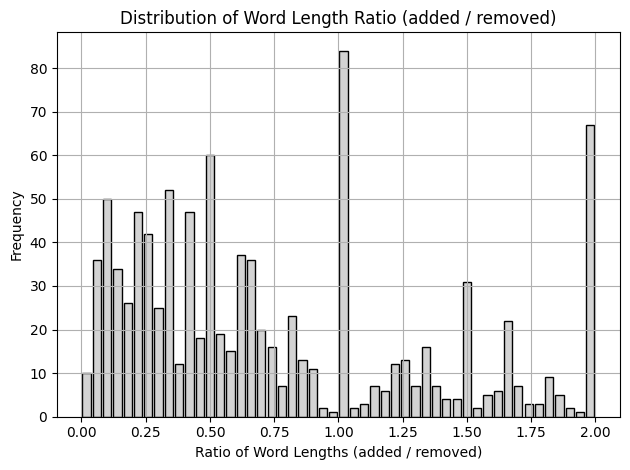

In [ ]:
def count_and_plot_word_length_ratio(df, column1, column2):
    """
    Count the length of words in the values of two specified columns in a DataFrame,
    compute the ratio of corresponding word lengths, and plot the distribution as a histogram.

    Parameters:
        df (pandas DataFrame): The DataFrame containing the data.
        column1 (str): The name of the first column in the DataFrame to analyze.
        column2 (str): The name of the second column in the DataFrame to analyze.
    """
    # Extract values from the specified columns
    values1 = df[column1]
    values2 = df[column2]

    # Tokenize words and count lengths for both columns
    word_lengths1 = [len(word) for value in values1 for word in str(value).split()]
    word_lengths2 = [len(word) for value in values2 for word in str(value).split()]

    # Compute the ratio of word lengths
    word_length_ratio = [length2 / length1 if length1 != 0 else float('NaN') for length1, length2 in zip(word_lengths1, word_lengths2)]

    # Plot histogram
    plt.hist(word_length_ratio, bins=50, range=(0, 2), rwidth=0.8, color='lightgray', edgecolor='black')
    plt.xlabel('Ratio of Word Lengths (added / removed)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Word Length Ratio (added / removed)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('figure/word-length-ratio.png')
    plt.show()
    return word_length_ratio

word_length_ratio = count_and_plot_word_length_ratio(df_patch, 'removed', 'added')

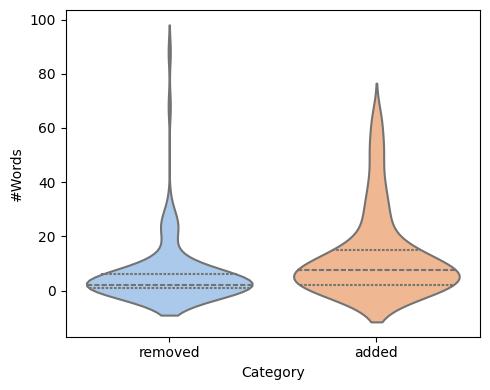

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

def count_and_plot_word_lengths(df, column1, column2, outlier_threshold=0.95):
    """
    Count the number of words in the values of two specified columns in a DataFrame
    and plot the distributions as violin plots side by side.

    Parameters:
        df (pandas DataFrame): The DataFrame containing the data.
        column1 (str): The name of the first column in the DataFrame to analyze.
        column2 (str): The name of the second column in the DataFrame to analyze.
        outlier_threshold (float): The threshold for identifying outliers (default is 0.95).
    """
    # Extract values from the specified columns
    values1 = df[column1]
    values2 = df[column2]

    # Count number of words for both columns
    word_counts1 = [len(str(value).split()) for value in values1]
    word_counts2 = [len(str(value).split()) for value in values2]

    # Identify outliers using quantiles
    max_outlier_count1 = np.quantile(word_counts1, outlier_threshold)
    max_outlier_count2 = np.quantile(word_counts2, outlier_threshold)

    # Filter out outliers
    filtered_word_counts1 = [count for count in word_counts1 if count <= max_outlier_count1]
    filtered_word_counts2 = [count for count in word_counts2 if count <= max_outlier_count2]

    # # Combine word counts from both columns
    # combined_word_counts = {'Category': [column1]*len(word_counts1) + [column2]*len(word_counts2),
    #                         '#Words': word_counts1 + word_counts2}
    
    # Combine word counts from both columns without outliers
    combined_word_counts = {'Category': [column1]*len(filtered_word_counts1) + [column2]*len(filtered_word_counts2),
                            '#Words': filtered_word_counts1 + filtered_word_counts2}

    # Create DataFrame from combined data
    combined_df = pd.DataFrame(combined_word_counts)

    # Plot violin plot
    plt.figure(figsize=(5, 4))
    sns.violinplot(x='Category', y='#Words', data=combined_df, inner='quartile', hue='Category', palette='pastel', color='lightgray', linewidth=1.5, width=0.8)
    plt.xlabel('Category')
    plt.ylabel('#Words')
    # plt.title('Distribution of Word Counts')
    # plt.title(f'Distribution of Word Counts in {column2}')
    plt.tight_layout()
    plt.savefig(f'figure/word-counts-violin.png')
    plt.show()

# Call the function with the DataFrame and column names
count_and_plot_word_lengths(df_patch, 'removed', 'added')